In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath='/content/drive/MyDrive/data.csv'

In [5]:
df=pd.read_csv(filepath,encoding='unicode_escape')

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [9]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [10]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

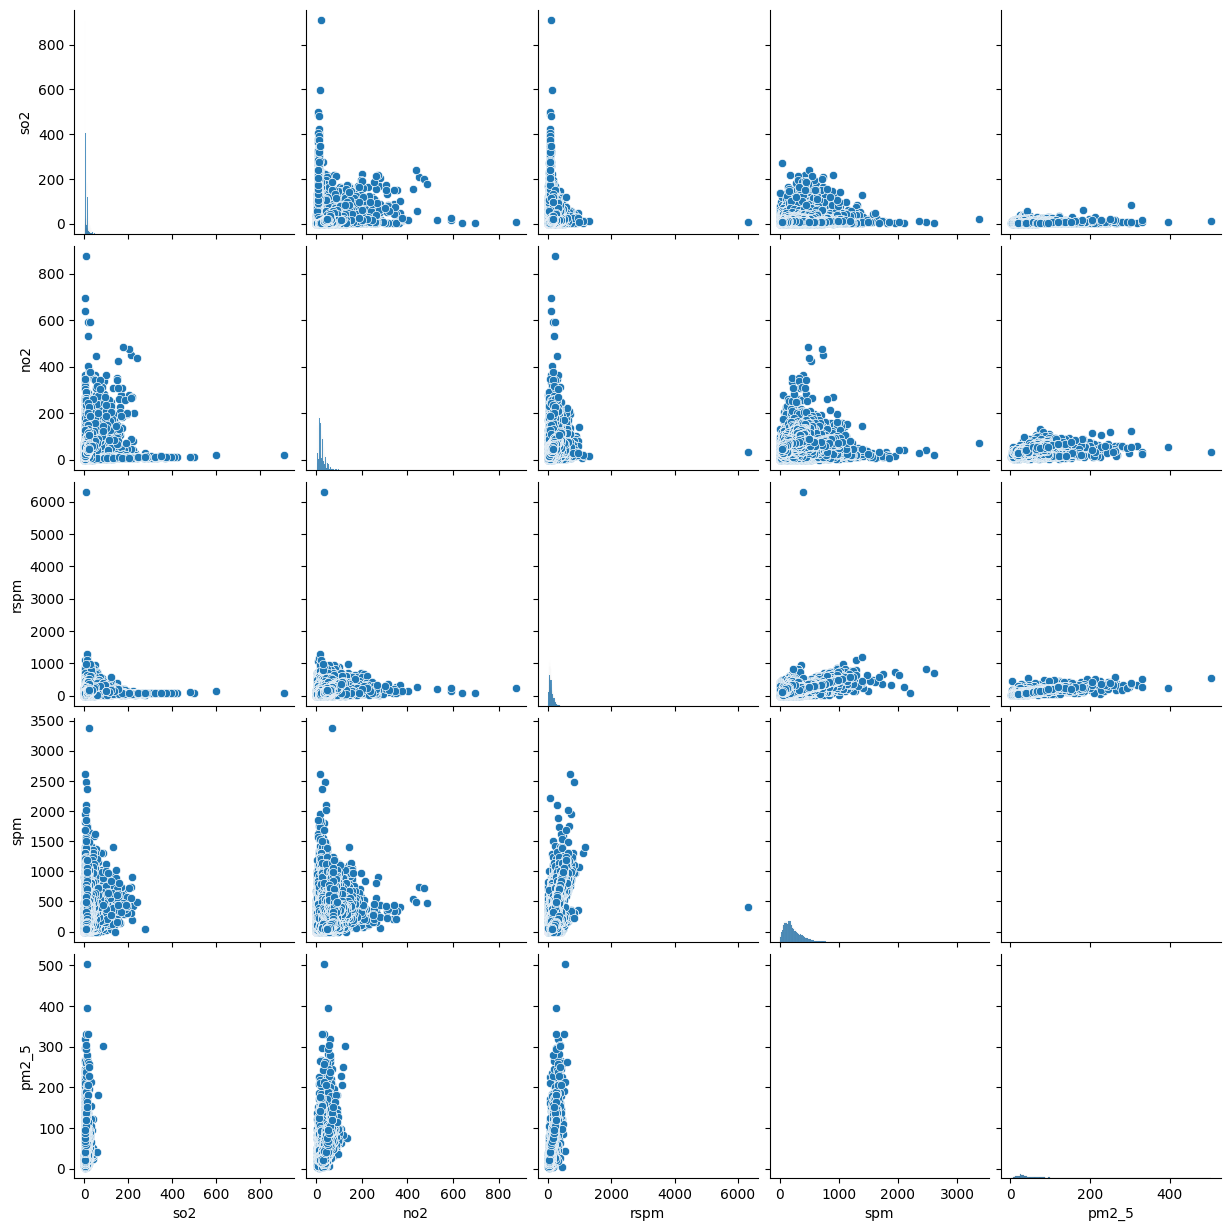

In [11]:
sns.pairplot(data=df)

In [12]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

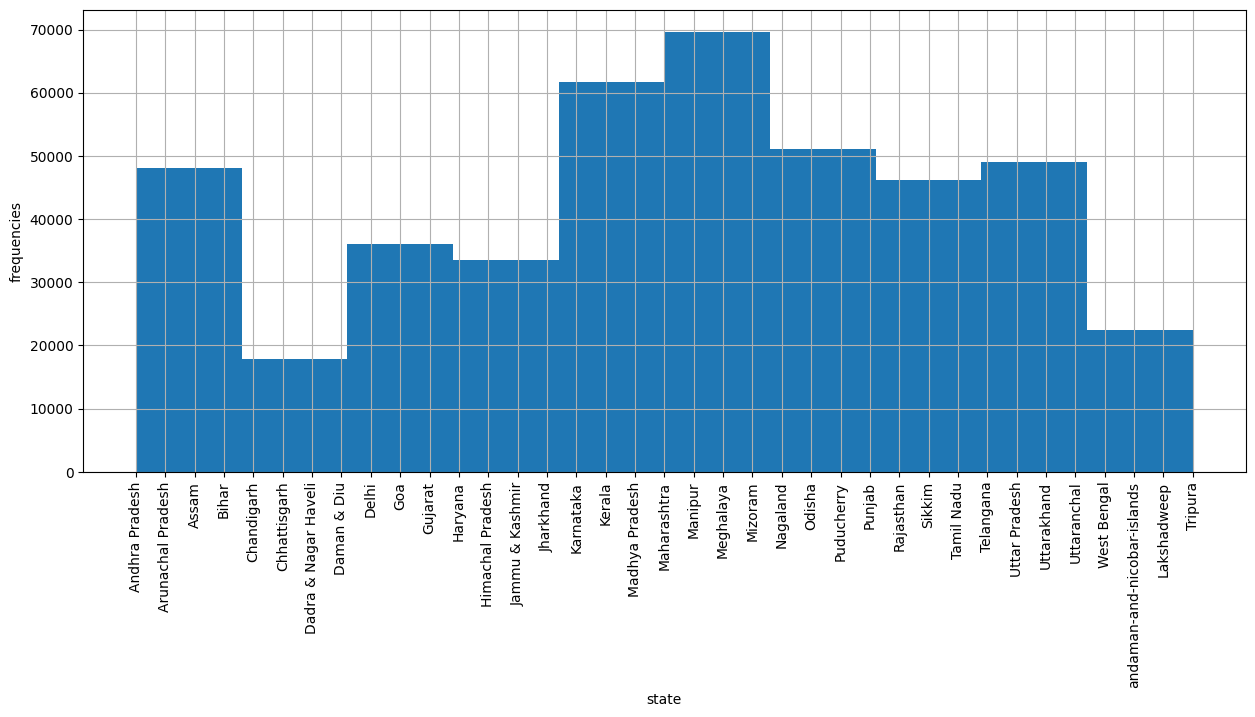

In [13]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('frequencies')
plt.plot()

In [14]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

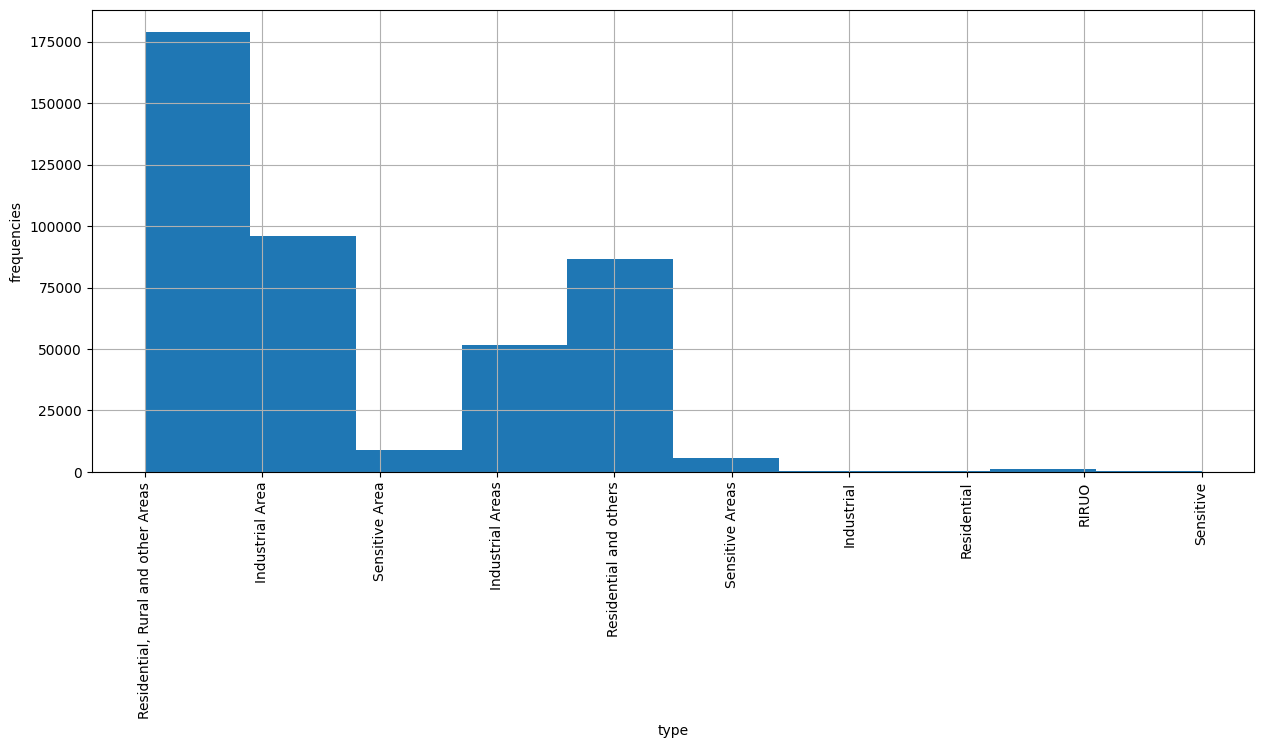

In [15]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('type')
plt.ylabel('frequencies')
plt.plot()

In [16]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

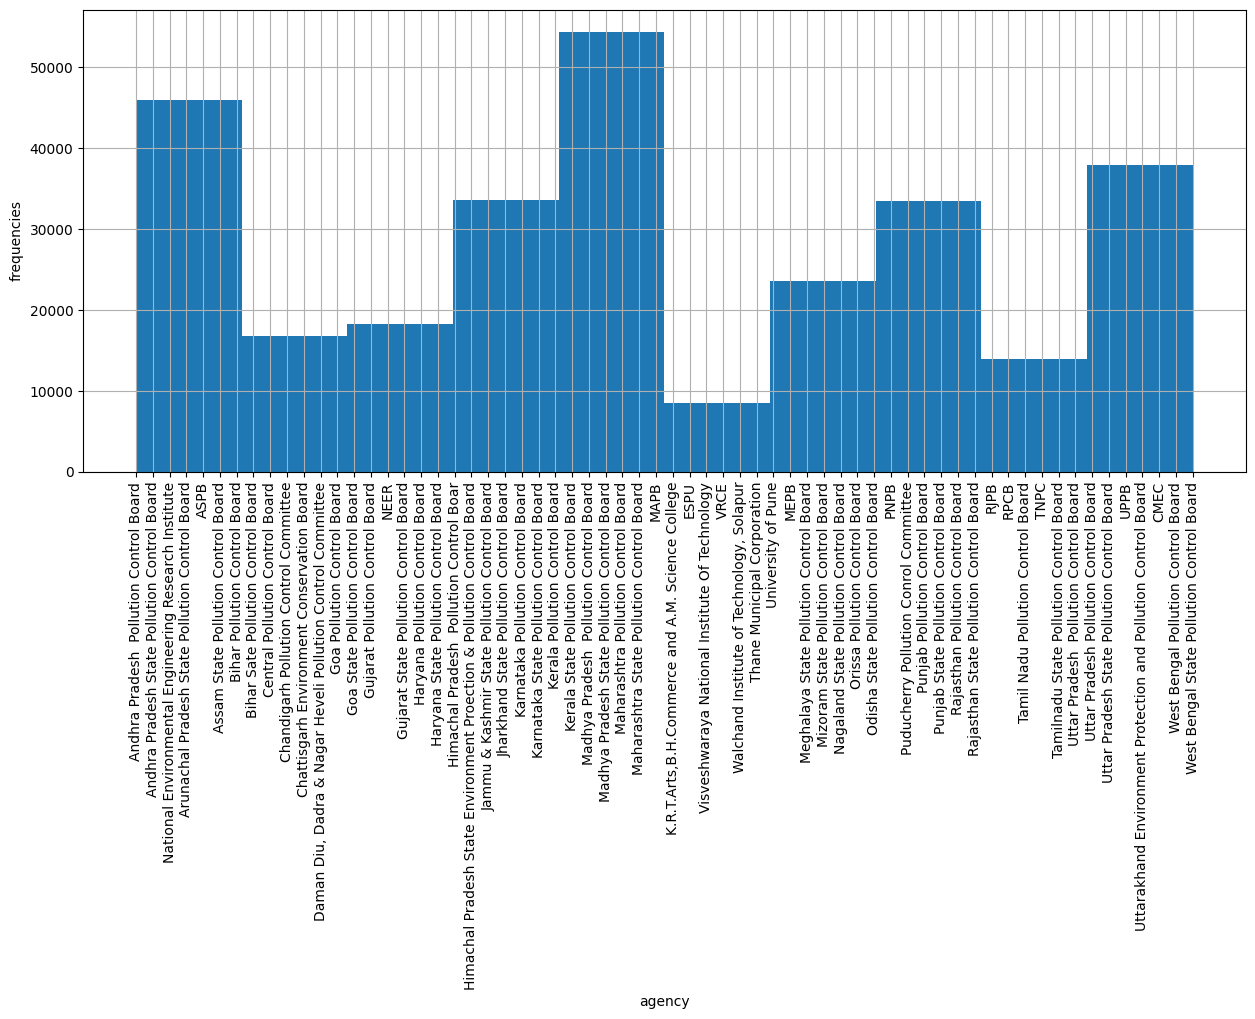

In [17]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('agency')
plt.ylabel('frequencies')
plt.plot()

<Axes: xlabel='state', ylabel='so2'>

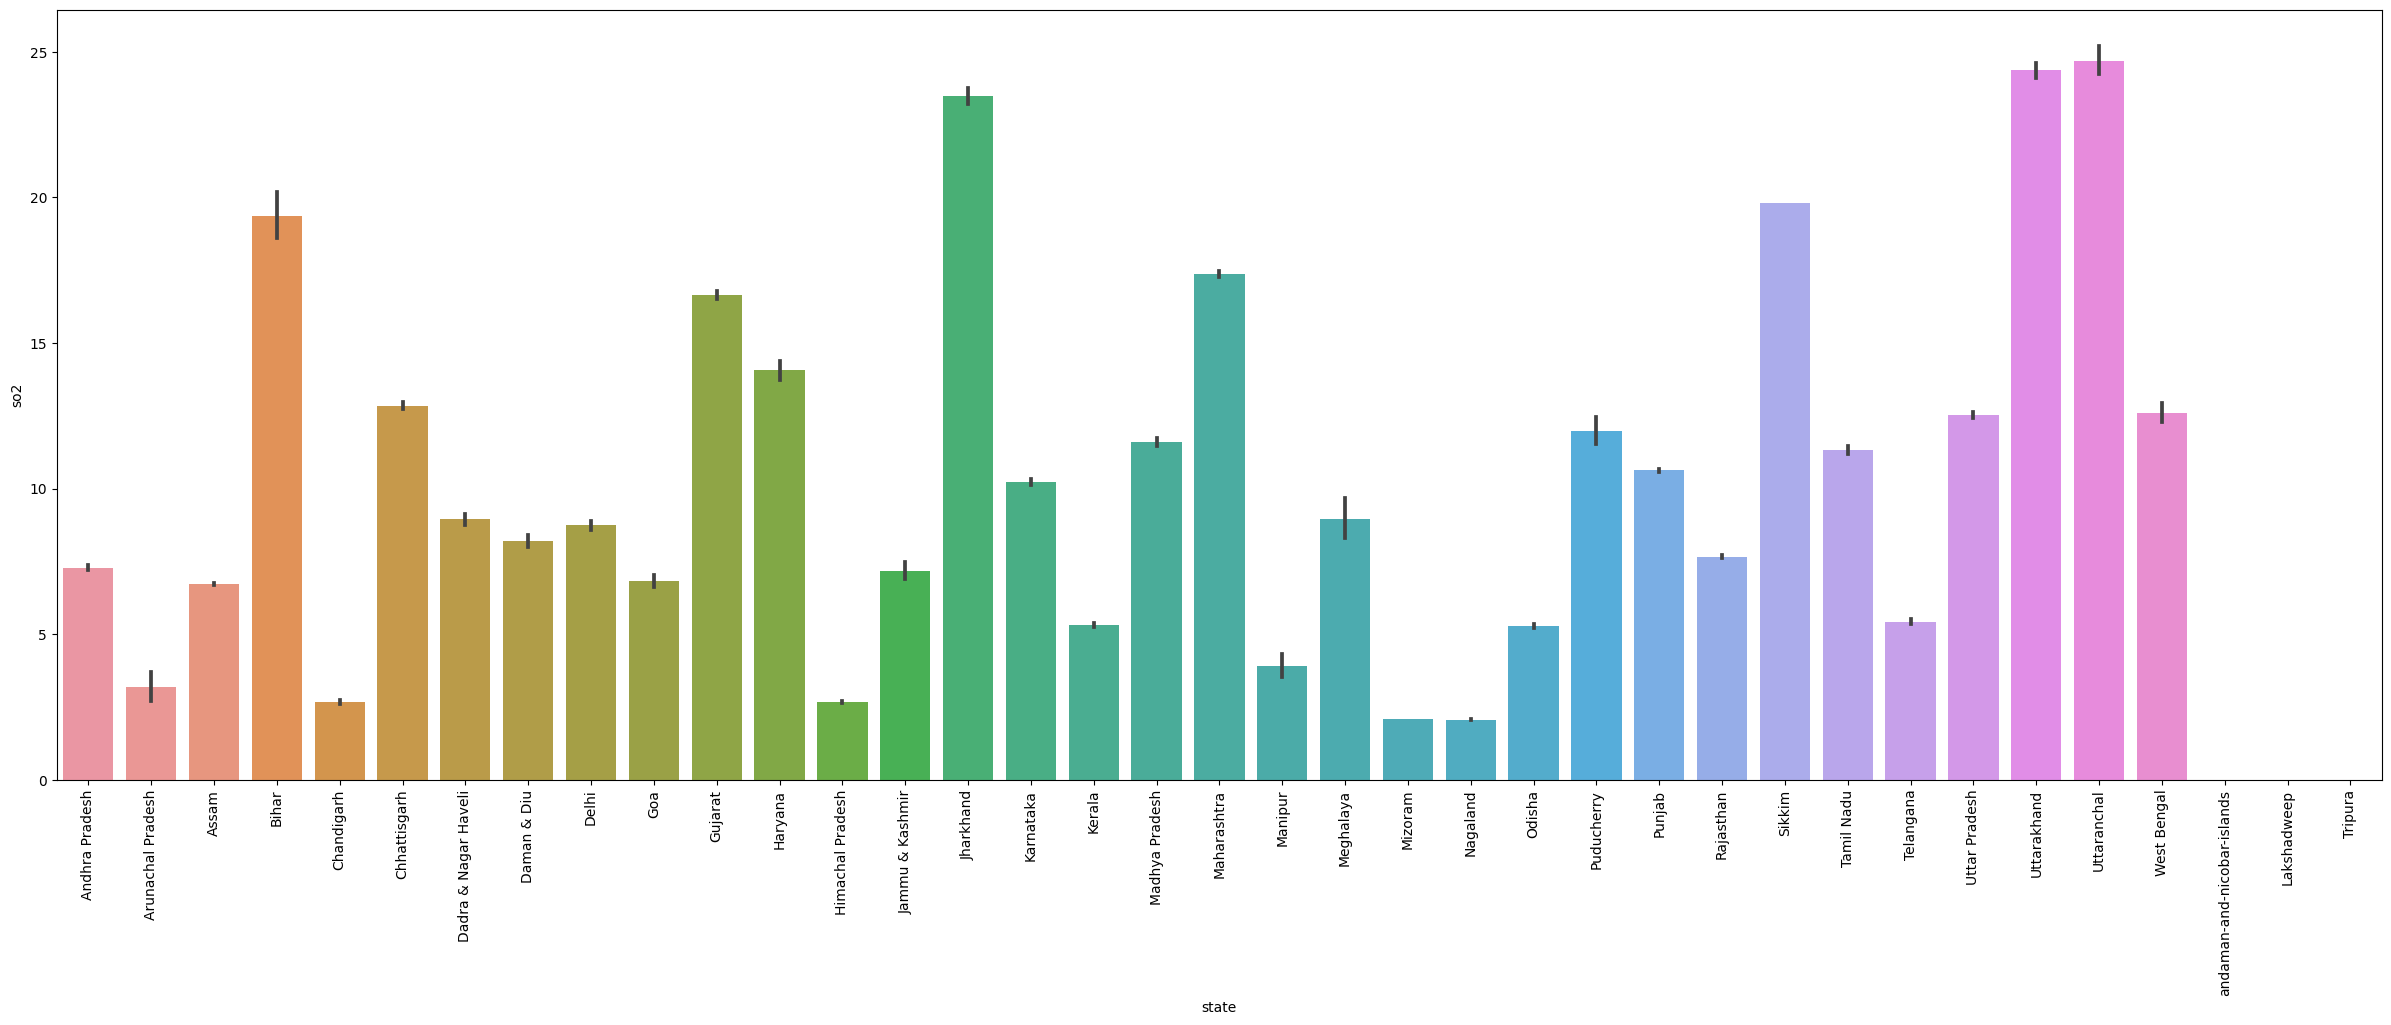

In [18]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)

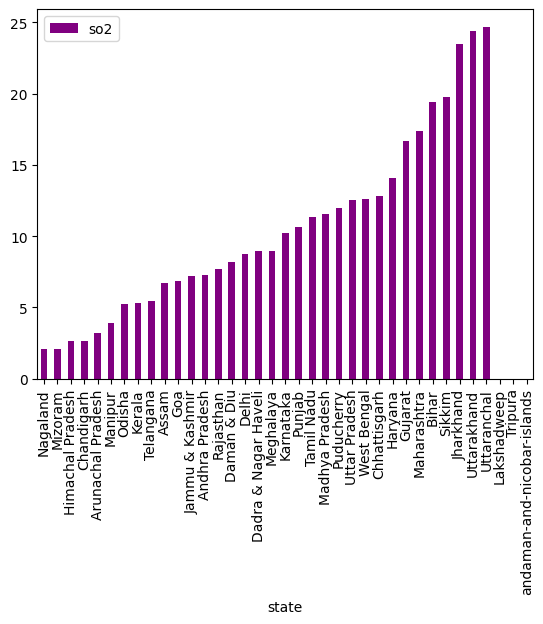

In [19]:
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='no2'>

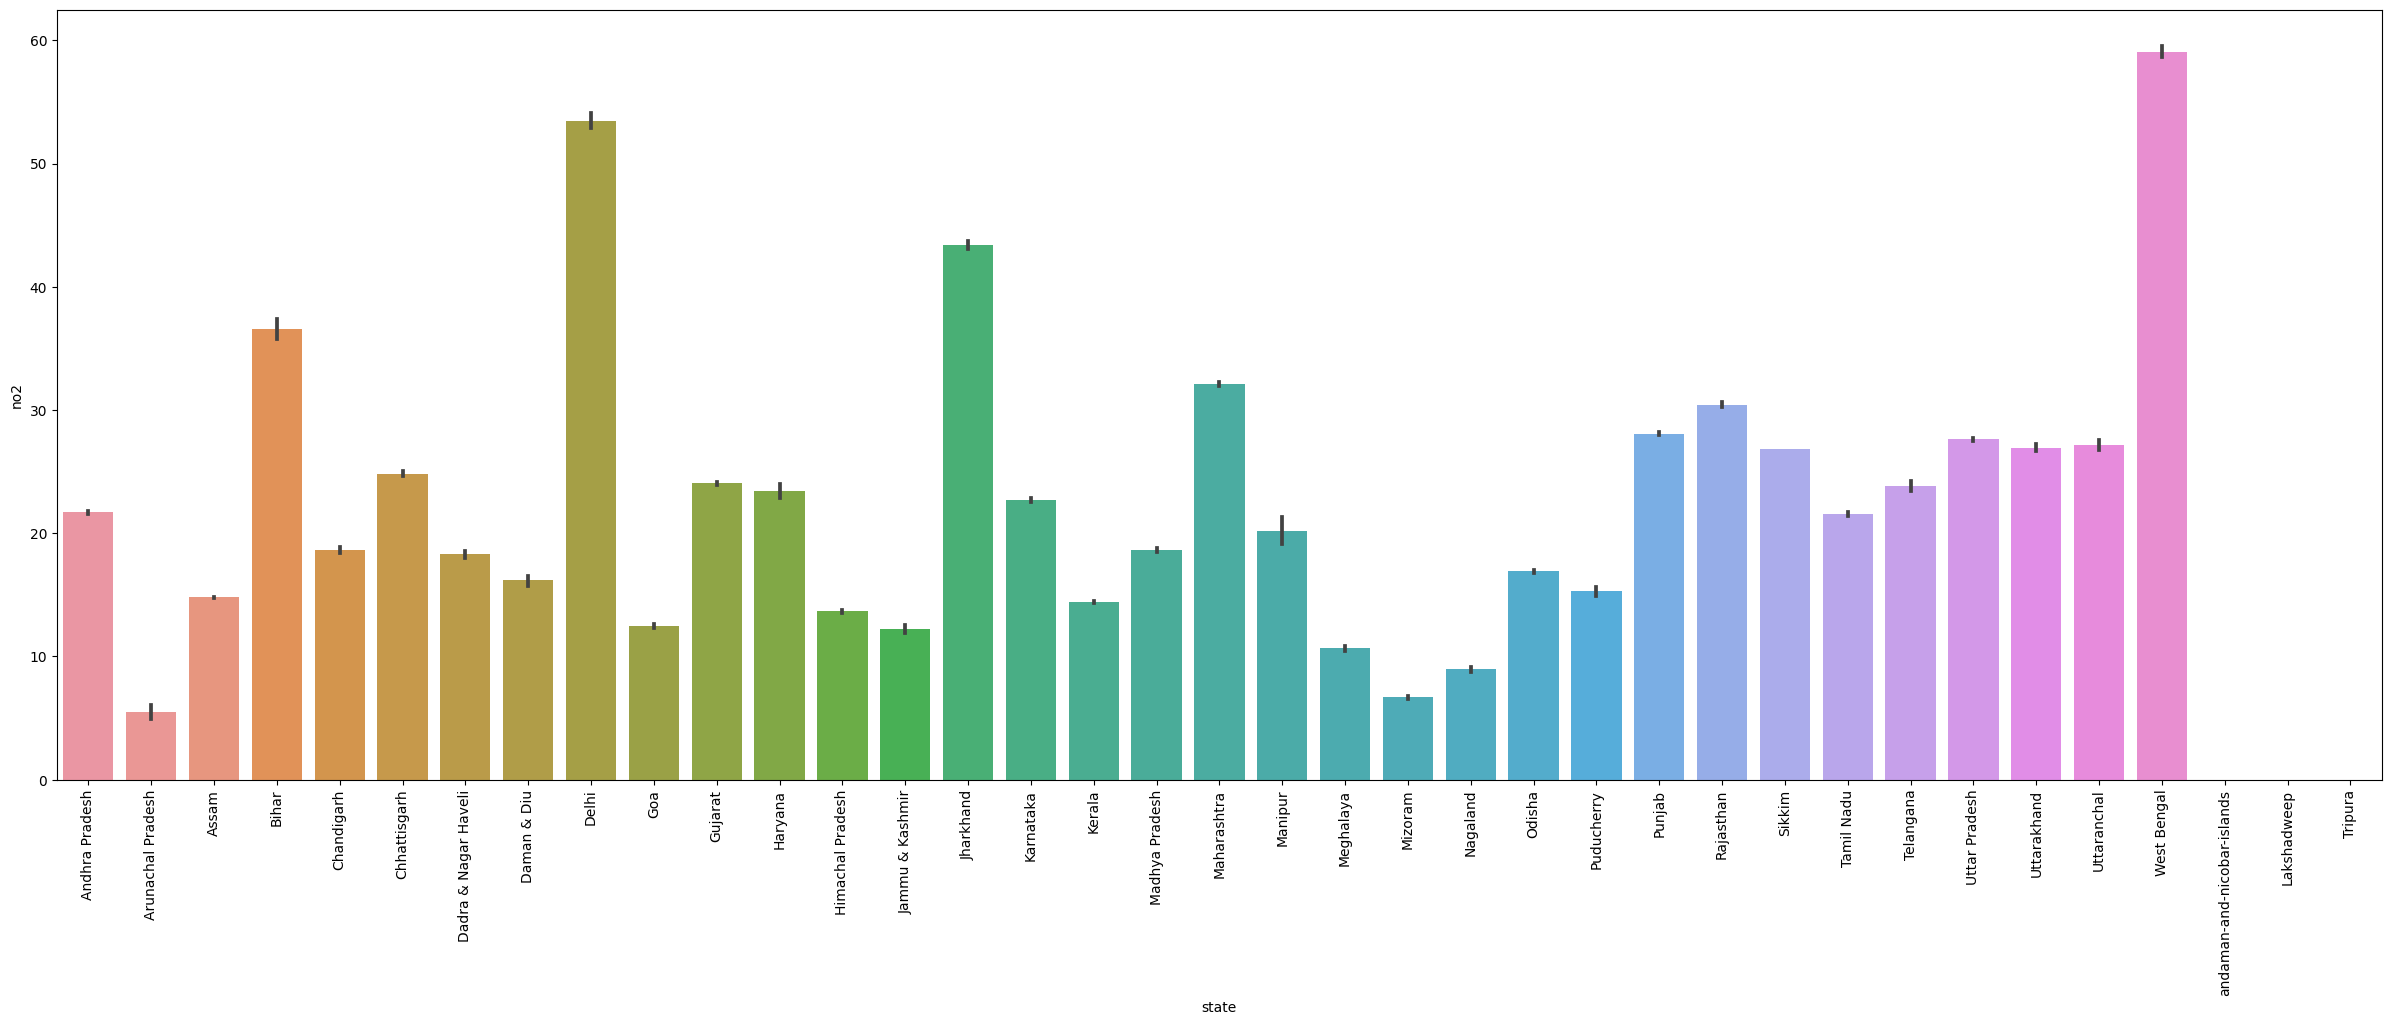

In [20]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)

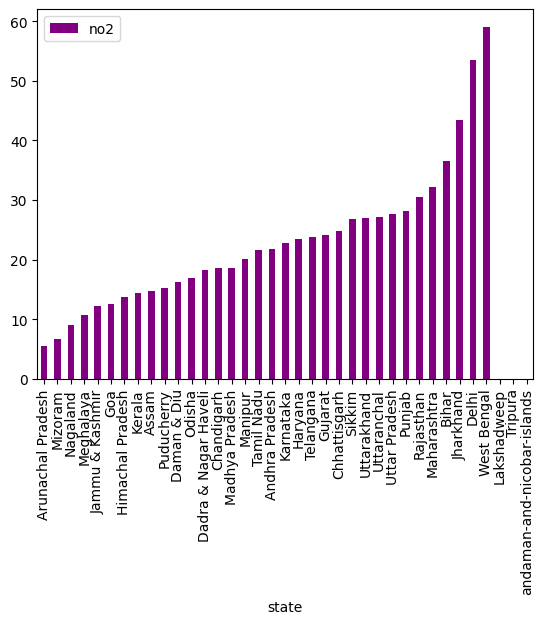

In [21]:
df[['no2','state']].groupby(['state']).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='rspm'>

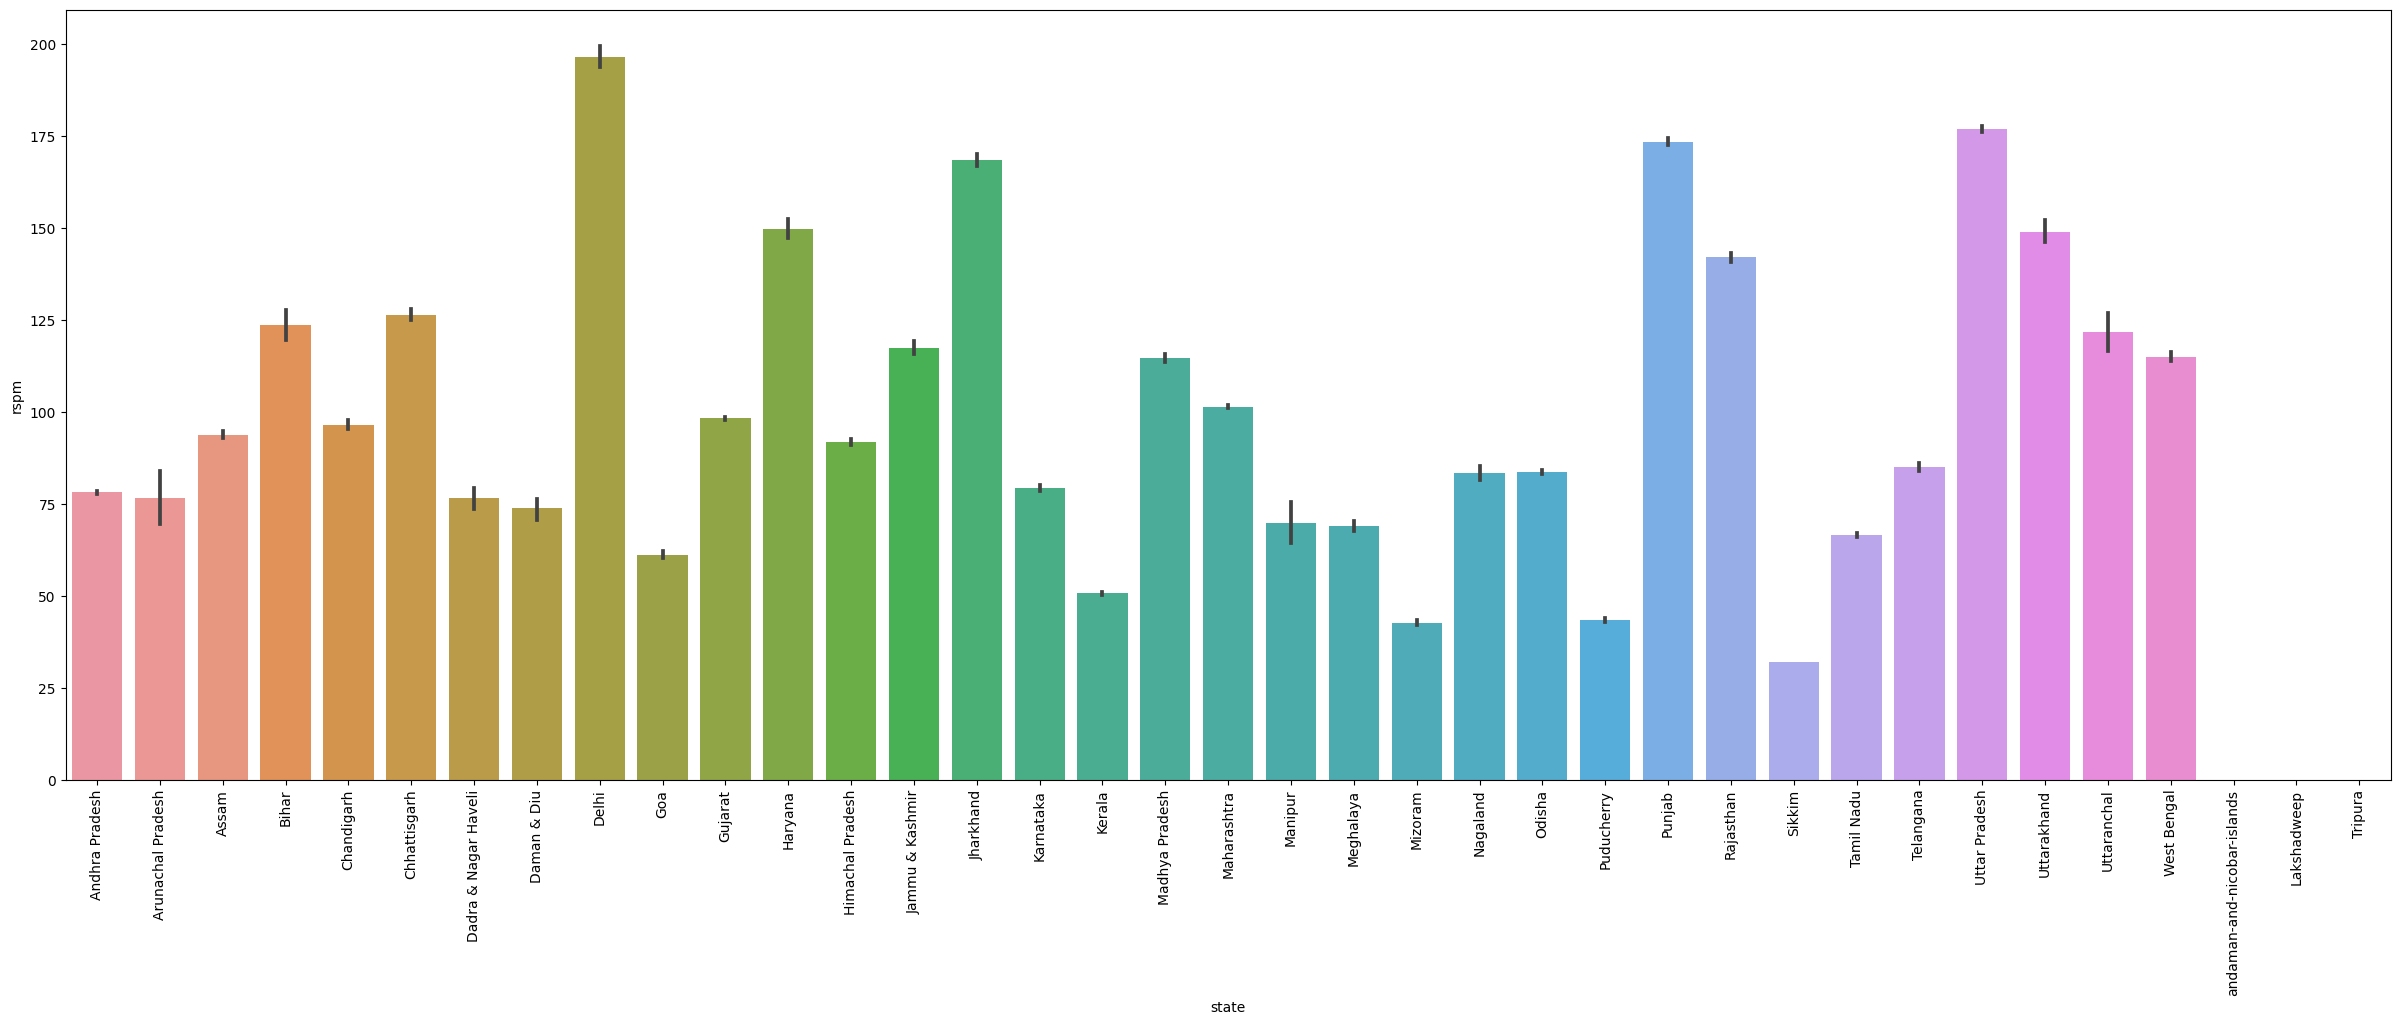

In [22]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)

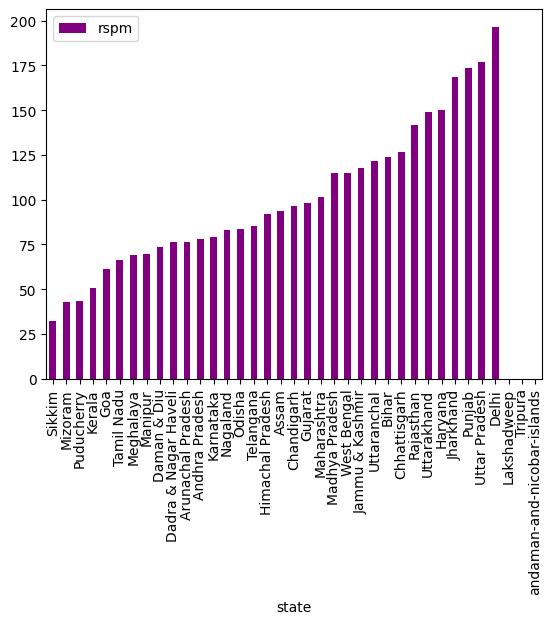

In [23]:
df[['rspm','state']].groupby(['state']).mean().sort_values(by='rspm').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='spm'>

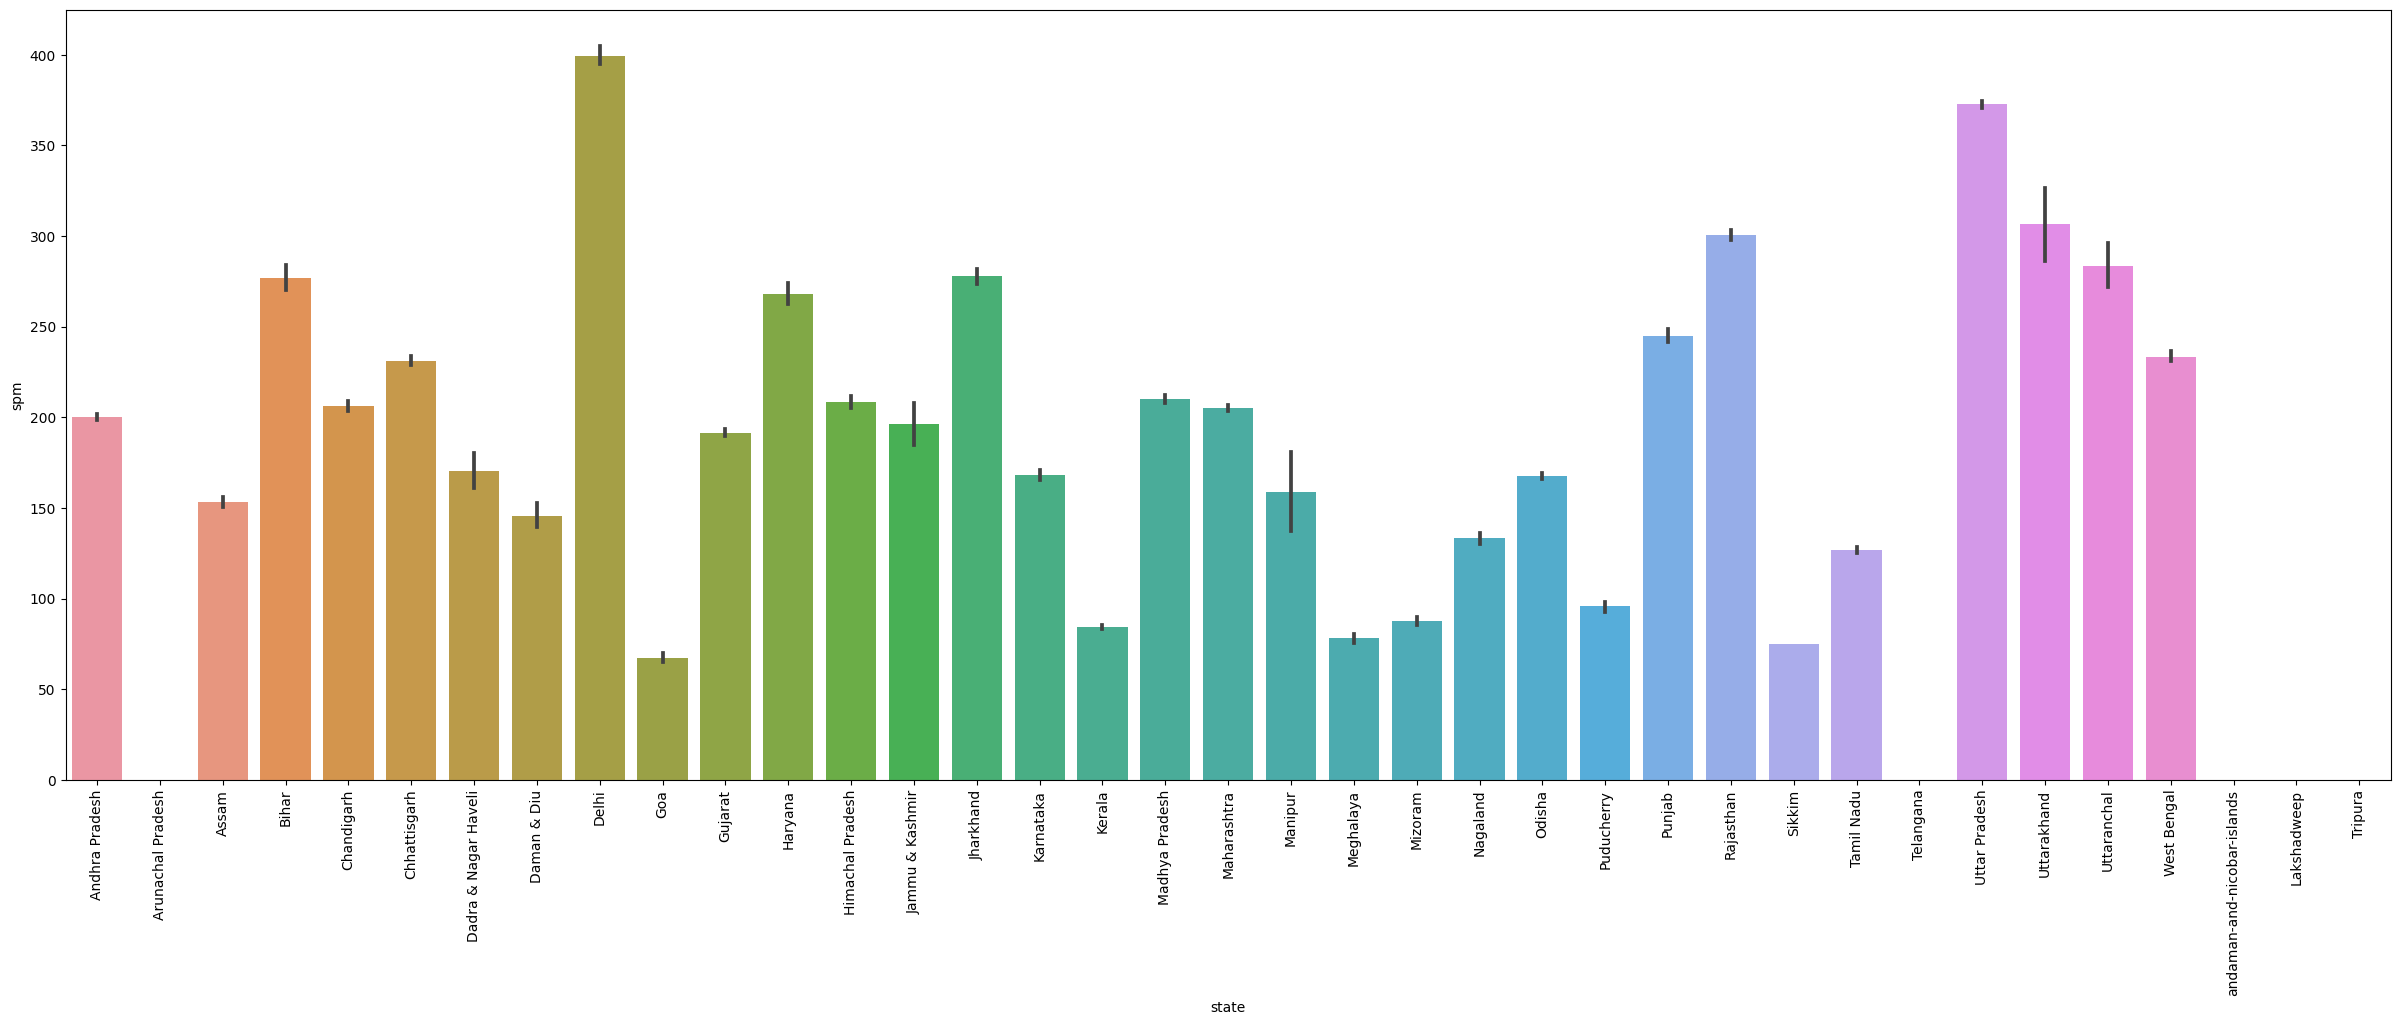

In [24]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df)

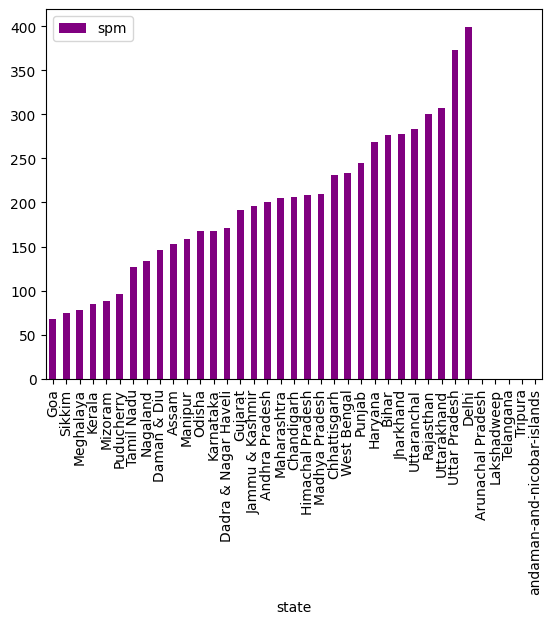

In [25]:
df[['spm','state']].groupby(['state']).mean().sort_values(by='spm').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='pm2_5'>

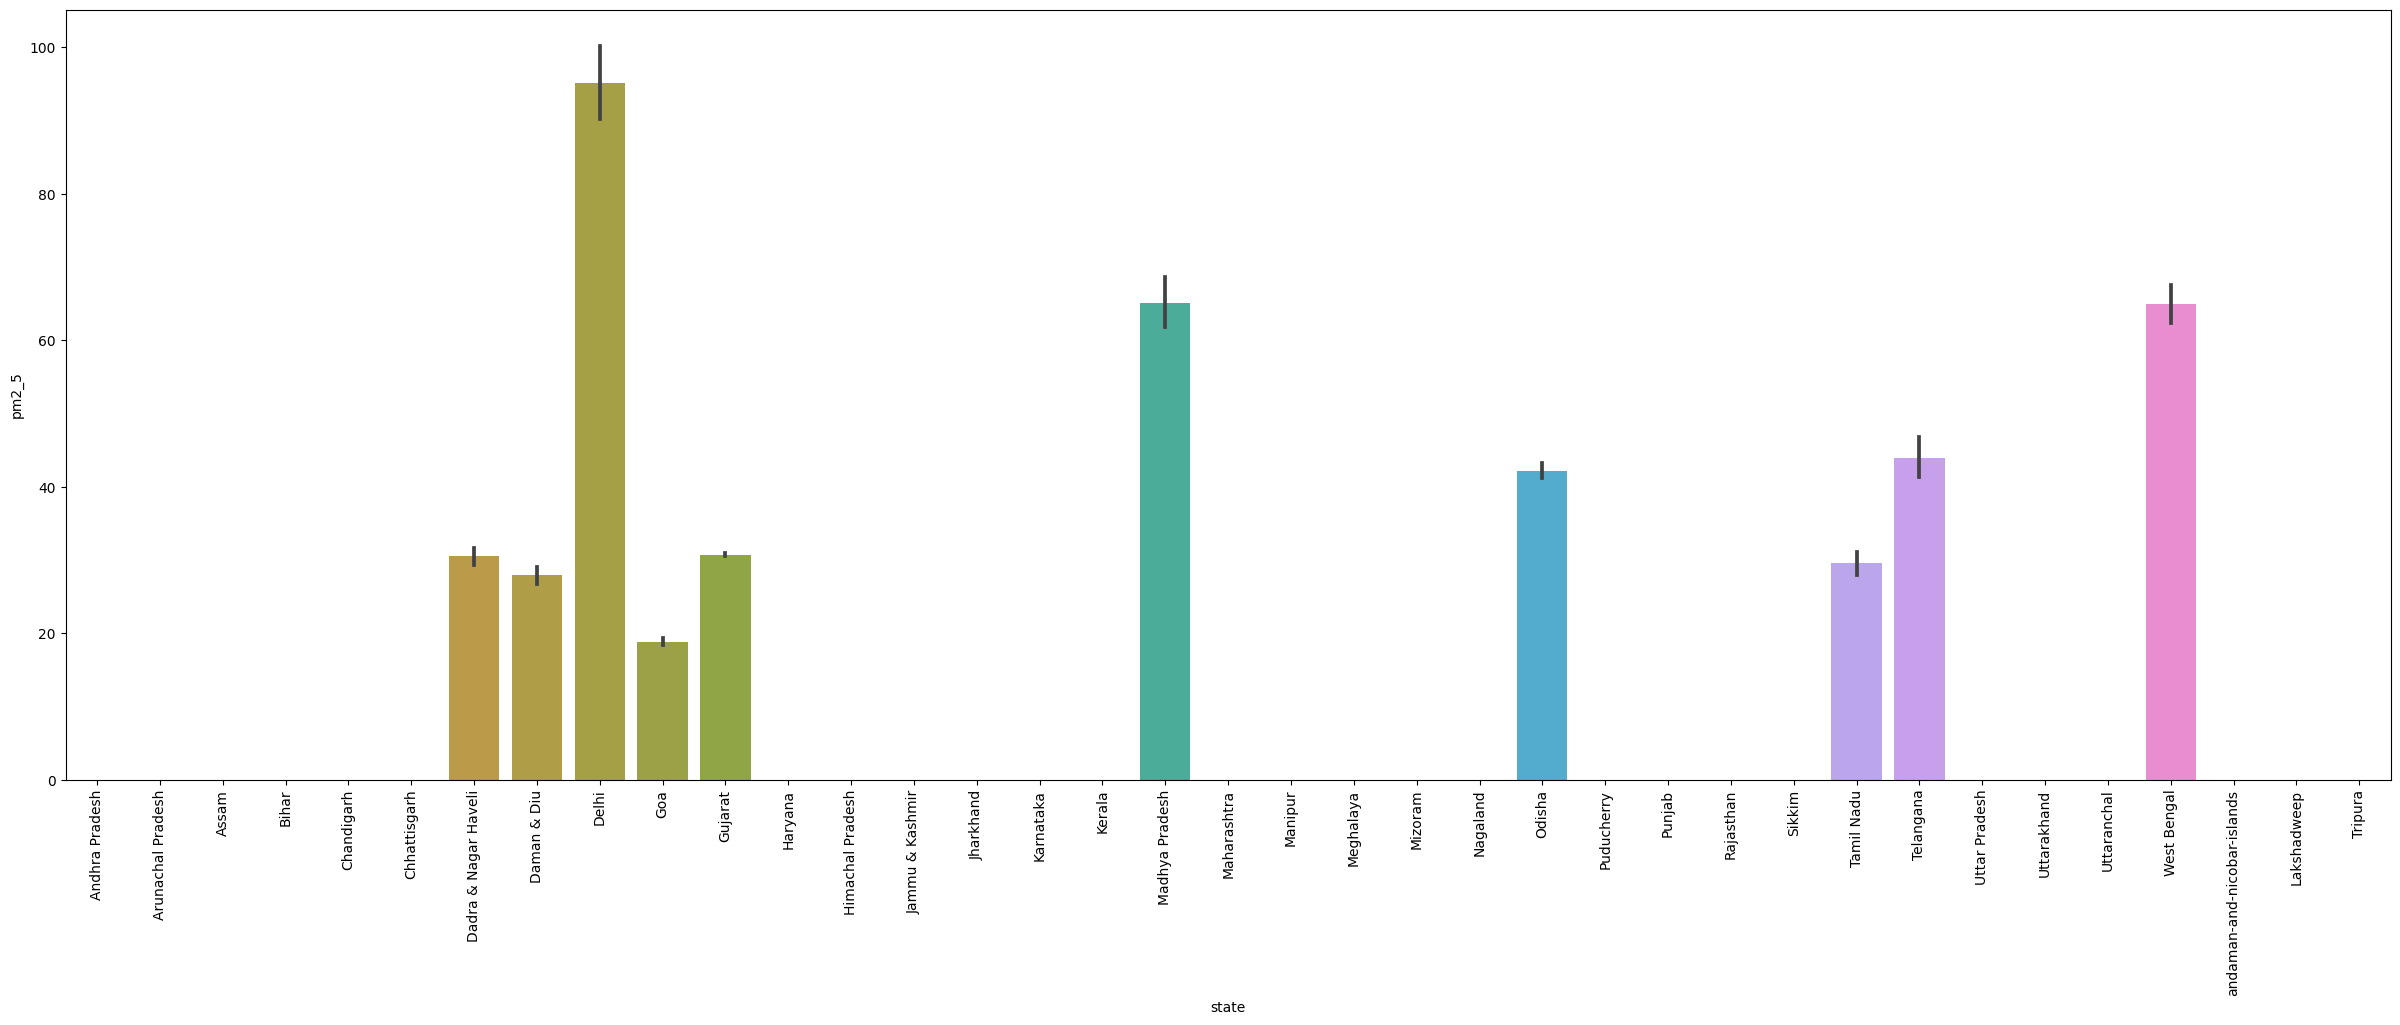

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df)

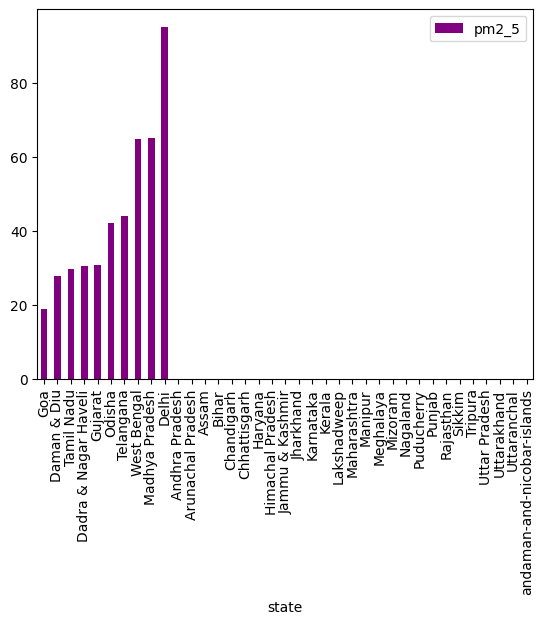

In [27]:
df[['pm2_5','state']].groupby(['state']).mean().sort_values(by='pm2_5').plot.bar(color='purple')
plt.show()

In [28]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [29]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [30]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [31]:
null_values_percentage

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [32]:
missing_data_with_percentage=pd.concat([nullvalues,null_values_percentage],axis=1,keys=['Total','Percent'])

In [33]:
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [34]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [35]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [36]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
##null value inputation for the categorial data

In [38]:
df.fillna(0,inplace=True)
##null values are replaced by 0for the numerical data

In [39]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [40]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


In [41]:
def cal_SOi(so2):     ##calculating indiviual pollutant index for so2
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [42]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [43]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [44]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [45]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [46]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [47]:
df['AQI_Range'].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

In [49]:
x=df[['SOi','Noi','Rpi','SPMi']] #splitting the dataset into dependent and independent terms
y=df['AQI']

In [50]:
x.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [51]:
y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
print(x_train)

           SOi     Noi  Rpi        SPMi
326215  14.375  17.250  0.0  424.418605
186237   0.000   0.000  0.0    0.000000
225352  38.750  31.250  0.0    0.000000
415940   7.125  37.750  0.0   84.000000
228916  20.000  51.250  0.0    0.000000
...        ...     ...  ...         ...
359783  23.750  33.750  0.0    0.000000
358083  13.750  25.000  0.0    0.000000
152315   2.500   6.250  0.0    0.000000
117952   3.750  22.500  0.0    0.000000
305711  16.625  44.125  0.0    0.000000

[348593 rows x 4 columns]


In [54]:
print(y_train)

326215    424.418605
186237      0.000000
225352     38.750000
415940     84.000000
228916     51.250000
             ...    
359783     33.750000
358083     25.000000
152315      6.250000
117952     22.500000
305711     44.125000
Name: AQI, Length: 348593, dtype: float64


In [55]:
print(x_test)

            SOi      Noi  Rpi        SPMi
274062   0.0000  25.0000  0.0  138.666667
23326    7.5000  11.2500  0.0    0.000000
265968   2.5000   6.2500  0.0    0.000000
431607   6.6625  53.3375  0.0    0.000000
28844    8.1250  20.0000  0.0   59.000000
...         ...      ...  ...         ...
167161  13.0000  16.8750  0.0    0.000000
4920     8.8750  41.3750  0.0  153.333333
72945    5.0000  46.2500  0.0    0.000000
103896  15.0000  36.2500  0.0    0.000000
314516  10.0000  25.0000  0.0    0.000000

[87149 rows x 4 columns]


In [56]:
print(y_test)

274062    138.666667
23326      11.250000
265968      6.250000
431607     53.337500
28844      59.000000
             ...    
167161     16.875000
4920      153.333333
72945      46.250000
103896     36.250000
314516     25.000000
Name: AQI, Length: 87149, dtype: float64


In [57]:
from sklearn.linear_model import LinearRegression ##training the model using Linear regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print('Root mean squared value error on training data=',str(rmse_train))
print('Root mean squared value erroron test data=',str(rmse_test))
print('-'*50)
print('R squared value on training data',model.score(x_train,y_train))
print('R squared value on testing data',model.score(x_test,y_test))

Root mean squared value error on training data= 13.59540589691493
Root mean squared value erroron test data= 13.625026920347976
--------------------------------------------------
R squared value on training data 0.9848718184256101
R squared value on testing data 0.9850528402452442


In [60]:
from sklearn.tree import DecisionTreeRegressor ##training the model using decision tree regression
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
train_preds=DT.predict(x_train)
test_preds=DT.predict(x_test)

In [62]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print('Root mean squared value error on training data=',str(rmse_train))
print('Root mean squared value erroron test data=',str(rmse_test))
print('-'*50)
print('R squared value on training data',DT.score(x_train,y_train))
print('R squared value on testing data',DT.score(x_test,y_test))

Root mean squared value error on training data= 2.2390999850631755e-13
Root mean squared value erroron test data= 1.1818237317826021
--------------------------------------------------
R squared value on training data 1.0
R squared value on testing data 0.9998875422599968


In [63]:
from sklearn.ensemble import RandomForestRegressor  ##training the model using random forest regression
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
train_preds1=RF.predict(x_train)
test_preds1=RF.predict(x_test)

In [66]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print('Root mean squared value error on training data=',str(rmse_train))
print('Root mean squared value error on test data=',str(rmse_test))
print('-'*50)
print('R squared value on training data',RF.score(x_train,y_train))
print('R squared value on testing data',RF.score(x_test,y_test))

Root mean squared value error on training data= 0.40751098816094006
Root mean squared value error on test data= 1.004431467908173
--------------------------------------------------
R squared value on training data 0.9999864080734404
R squared value on testing data 0.9999187684839275


In [67]:
###CLASSIFICATION ALGORITHMS##

In [68]:
x=df[['SOi','Noi','Rpi','SPMi']] #splitting the dataset into dependent and independent terms
y=df['AQI_Range']

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [70]:
print(x_train)

           SOi     Noi  Rpi  SPMi
310667   7.500  42.500  0.0   0.0
357072  20.000  28.750  0.0   0.0
311653  15.000  36.250  0.0   0.0
200969   0.000   0.000  0.0  23.0
237070  40.000  91.250  0.0   0.0
...        ...     ...  ...   ...
359783  23.750  33.750  0.0   0.0
358083  13.750  25.000  0.0   0.0
152315   2.500   6.250  0.0   0.0
117952   3.750  22.500  0.0   0.0
305711  16.625  44.125  0.0   0.0

[291947 rows x 4 columns]


In [71]:
print(y_train)

310667        Good
357072        Good
311653        Good
200969        Good
237070    Moderate
            ...   
359783        Good
358083        Good
152315        Good
117952        Good
305711        Good
Name: AQI_Range, Length: 291947, dtype: object


In [72]:
print(x_test)

            SOi      Noi  Rpi        SPMi
274062   0.0000  25.0000  0.0  138.666667
23326    7.5000  11.2500  0.0    0.000000
265968   2.5000   6.2500  0.0    0.000000
431607   6.6625  53.3375  0.0    0.000000
28844    8.1250  20.0000  0.0   59.000000
...         ...      ...  ...         ...
124038   2.5000  16.2500  0.0    0.000000
409339  32.5000  31.2500  0.0    0.000000
265042   2.5000  11.2500  0.0    0.000000
190689   2.5000  13.0000  0.0    0.000000
31945    6.8750  15.0000  0.0  156.000000

[143795 rows x 4 columns]


In [73]:
print(y_test)

274062        Poor
23326         Good
265968        Good
431607    Moderate
28844     Moderate
            ...   
124038        Good
409339        Good
265042        Good
190689        Good
31945         Poor
Name: AQI_Range, Length: 143795, dtype: object


In [74]:
from sklearn.linear_model import LogisticRegression  ##Training the model with logistic regression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [75]:
train_preds2=log_reg.predict(x_train)
test_preds2=log_reg.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
print('Model accuracy on training data is=',accuracy_score(y_train,train_preds2))
print('Model accuracy on testing data is=',accuracy_score(y_test,test_preds2))
print('-'*50)
print('Kappa score is=',metrics.cohen_kappa_score(y_test,test_preds2))

Model accuracy on training data is= 0.6949686073157114
Model accuracy on testing data is= 0.69401578636253
--------------------------------------------------
Kappa score is= 0.5260115427693917


In [77]:
log_reg.predict([[727,327.55,78,99]])

array(['Good'], dtype=object)

In [78]:
log_reg.predict([[2.7,45,36,25]])

array(['Good'], dtype=object)

In [79]:
from sklearn.tree import DecisionTreeClassifier  ##Training the model with decision tree classifier
DT2=DecisionTreeClassifier()
DT2.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
train_preds3=DT2.predict(x_train)
test_preds3=DT2.predict(x_test)

In [81]:
print('Model accuracy on training data is=',accuracy_score(y_train,train_preds3))
print('Model accuracy on testing data is=',accuracy_score(y_test,test_preds3))
print('-'*50)
print('Kappa score is=',metrics.cohen_kappa_score(y_test,test_preds3))

Model accuracy on training data is= 1.0
Model accuracy on testing data is= 0.9998748217949164
--------------------------------------------------
Kappa score is= 0.9998144341452903


In [82]:
from sklearn.ensemble import RandomForestClassifier  ##Training the model with random forest classification
RF2=RandomForestClassifier()
RF2.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
train_preds4=RF2.predict(x_train)
test_preds4=RF2.predict(x_test)

In [84]:
print('Model accuracy on training data is=',accuracy_score(y_train,train_preds4))
print('Model accuracy on testing data is=',accuracy_score(y_test,test_preds4))
print('-'*50)
print('Kappa score is=',metrics.cohen_kappa_score(y_test,test_preds4))

Model accuracy on training data is= 1.0
Model accuracy on testing data is= 0.9998887304843701
--------------------------------------------------
Kappa score is= 0.9998350543185988


In [85]:
from sklearn.neighbors import KNeighborsClassifier ##Training the model k nearest neighbour classifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
train_preds5=KNN.predict(x_train)
test_preds5=KNN.predict(x_test)

In [87]:
print('Model accuracy on training data is=',accuracy_score(y_train,train_preds5))
print('Model accuracy on testing data is=',accuracy_score(y_test,test_preds5))
print('-'*50)
print('Kappa score is=',metrics.cohen_kappa_score(y_test,test_preds5))

Model accuracy on training data is= 0.998311337331776
Model accuracy on testing data is= 0.9968218644598212
--------------------------------------------------
Kappa score is= 0.9952877906122022


In [88]:
KNN.predict([[325.7,345,798.132,203]])

array(['Unhealthy'], dtype=object)